In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [69]:
# Step 1: read data
bikes = pd.read_csv('bike_sharing_hour.csv')
bikes.columns
bikes = bikes.rename(columns = {'cnt':'demand'})
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'demand'],
      dtype='object')

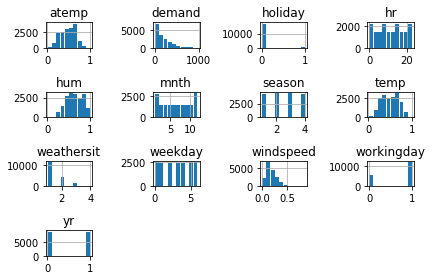

In [70]:
# Step 2: Preliminary analysis and feature selection
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['instant', 'dteday','casual','registered'], axis = 1)

# check the null or missing values
bikes_prep.isnull().sum()

# simple visualization of data using pandas histogram
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()

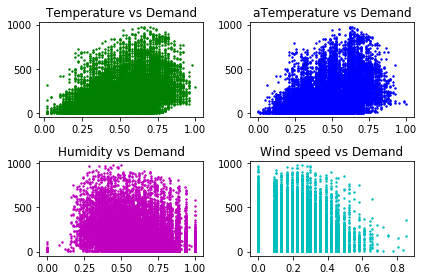

In [71]:
# Step 3: Data visualization

# visulise the continuous feature vs demand
plt.subplot(2,2,1)
plt.title('Temperature vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s = 2, c = 'g')

plt.subplot(2,2,2)
plt.title('aTemperature vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s = 2, c = 'b')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(bikes_prep['hum'], bikes_prep['demand'], s = 2, c = 'm')

plt.subplot(2,2,4)
plt.title('Wind speed vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s = 2, c = 'c')

plt.tight_layout()

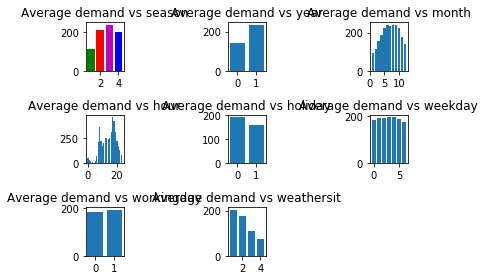

In [72]:
# visualise the categorical features
colors = ['g', 'r', 'm', 'b']
plt.subplot(3, 3, 1)
cat_list1 = bikes_prep['season'].unique()
cat_average1 = bikes_prep.groupby('season').mean()['demand']
plt.title('Average demand vs season')
plt.bar(cat_list1, cat_average1, color = colors)

plt.subplot(3, 3, 2)
cat_list2 = bikes_prep['yr'].unique()
cat_average2 = bikes_prep.groupby('yr').mean()['demand']
plt.title('Average demand vs year')
plt.bar(cat_list2, cat_average2)

plt.subplot(3, 3, 3)
cat_list3 = bikes_prep['mnth'].unique()
cat_average3 = bikes_prep.groupby('mnth').mean()['demand']
plt.title('Average demand vs month')
plt.bar(cat_list3, cat_average3)

plt.subplot(3, 3, 4)
cat_list4 = bikes_prep['hr'].unique()
cat_average4 = bikes_prep.groupby('hr').mean()['demand']
plt.title('Average demand vs hour')
plt.bar(cat_list4, cat_average4)

plt.subplot(3, 3, 5)
cat_list5 = bikes_prep['holiday'].unique()
cat_average5 = bikes_prep.groupby('holiday').mean()['demand']
plt.title('Average demand vs holiday')
plt.bar(cat_list5, cat_average5)

plt.subplot(3, 3, 6)
cat_list6 = bikes_prep['weekday'].unique()
cat_average6 = bikes_prep.groupby('weekday').mean()['demand']
plt.title('Average demand vs weekday')
plt.bar(cat_list6, cat_average6)

plt.subplot(3, 3, 7)
cat_list7 = bikes_prep['workingday'].unique()
cat_average7 = bikes_prep.groupby('workingday').mean()['demand']
plt.title('Average demand vs workingday')
plt.bar(cat_list7, cat_average7)

plt.subplot(3, 3, 8)
cat_list8 = bikes_prep['weathersit'].unique()
cat_average8 = bikes_prep.groupby('weathersit').mean()['demand']
plt.title('Average demand vs weathersit')
plt.bar(cat_list8, cat_average8)

plt.tight_layout()


In [73]:
# check the outliers
bikes_prep['demand'].describe()
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [74]:
# Step 4: check multiple linear regression assuption

# linearity using correlation coefficent matrix using corr
correlation = bikes_prep[['temp', 'atemp', 'hum', 'windspeed', 'demand']].corr()
print(correlation)

               temp     atemp       hum  windspeed    demand
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
demand     0.404772  0.400929 -0.322911   0.093234  1.000000


In [75]:
# drop irrelevant features
bikes_prep = bikes_prep.drop(['weekday', 'yr', 'workingday', 'atemp', 'windspeed'], axis = 1)
bikes_prep.head()

,season,mnth,hr,holiday,weathersit,temp,hum,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474902, 0.47049752, 0.49623013, 0.49404258, 0.46796134,
        0.47732246, 0.52675986, 0.5914599 , 0.65201837, 0.71519846,
        0.80591357, 0.9253135 , 1.        , 0.9253135 , 0.80591357,
        0.71519846, 0.65201837, 0.5914599 , 0.52675986, 0.47732246,
        0.46796134, 0.49404258, 0.49623013, 0.47049752, 0.45474902],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x9043e9e860>)

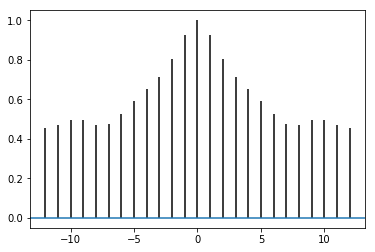

In [76]:
# check the autocorrelation in demand using the acorr plot
dff1 = pd.to_numeric(bikes_prep['demand'], downcast = 'float')
plt.acorr(dff1, maxlags = 12)

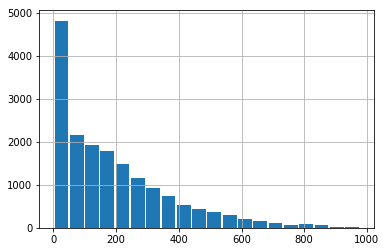

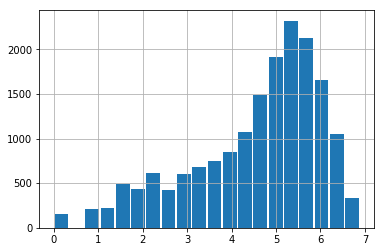

In [77]:
# Step 6: create/ modify new features

#log normalise the feature 'demand'
df1 = bikes_prep['demand']
df2 = np.log(df1)
plt.figure()
df1.hist(rwidth = 0.9, bins = 20)
plt.figure()
df2.hist(rwidth = 0.9, bins = 20)

bikes_prep['demand'] = np.log(bikes_prep['demand'])



In [80]:
#Auto correlation in demand column
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']
t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']
t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis =1)

bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag.head()

,season,mnth,hr,holiday,weathersit,temp,hum,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [81]:
# Step 7: Create dummy variable and drop first to avoid dummy variable trap
bikes_prep_lag['demand'].dtype

dtype('float64')

In [88]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['mnth'] = bikes_prep_lag['mnth'].astype('category')
bikes_prep_lag['hr'] = bikes_prep_lag['hr'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weathersit'] = bikes_prep_lag['weathersit'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first = True)
bikes_prep_lag.head()

,temp,hum,demand,t-1,t-2,t-3,season_2,season_3,season_4,mnth_2,...,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,weathersit_2,weathersit_3,weathersit_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Step 8: split the X and Y dataset into training and testing 

# demand is time dependent 
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis=1)

# Create training set at 70%
tr_size = int(0.7 * len(X))
X_train = X.values[0:tr_size]
X_test = X.values[tr_size:len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]


In [94]:
# Step 9: fit and score the model

# linear regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)

print(r2_train)
print(r2_test)

# Create Y Predictions
Y_predict = std_reg.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))
print(rmse)

0.9195240591465778
0.9287151360253386
0.38098800498170426


In [95]:
# Calculate RMSLE and compare results
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.3560941706980208
